# Prosper Loan Data Wrangling

## Priliminary Wrangling


This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [1]:
# Import all the packages and set plots to be embeded inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px 

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe, print statistics
loan_data = pd.read_csv('prosperLoanData.csv')

In [3]:
# high-level overview of data shape and composition
loan_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [4]:
loan_data.head(10)

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   
5  0F05359734824199381F61D        1074836  2013-12-14 08:26:37.093000000   
6  0F0A3576754255009D63151         750899  2013-04-12 09:52:56.147000000   
7  0F1035772717087366F9EA7         768193  2013-05-05 06:49:27.493000000   
8  0F043596202561788EA13D5        1023355  2013-12-02 10:43:39.117000000   
9  0F043596202561788EA13D5        1023355  2013-12-02 10:43:39.117000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   
5         NaN    60    Current                  NaN      0.15425   
6         NaN    36    Current                  NaN      0.31032   
7         NaN    36    Current                  NaN      0.23939   
8         NaN    36    Current                  NaN      0.07620   
9         NaN    36    Current                  NaN      0.07620   

   BorrowerRate  LenderYield  ...  LP_ServiceFees  LP_CollectionFees  \
0        0.1580       0.1380  ...         -133.18                0.0   
1        0.0920       0.0820  ...            0.00                0.0   
2        0.2750       0.2400  ...          -24.20                0.0   
3        0.0974       0.0874  ...         -108.01                0.0   
4        0.2085       0.1985  ...          -60.27                0.0   
5        0.1314       0.1214  ...          -25.33                0.0   
6        0.2712       0.2612  ...          -22.95                0.0   
7        0.2019       0.1919  ...          -69.21                0.0   
8        0.0629       0.0529  ...          -16.77                0.0   
9        0.0629       0.0529  ...          -16.77                0.0   

   LP_GrossPrincipalLoss  LP_NetPrincipalLoss LP_NonPrincipalRecoverypayments  \
0                    0.0                  0.0                             0.0   
1                    0.0                  0.0                             0.0   
2                    0.0                  0.0                             0.0   
3                    0.0                  0.0                             0.0   
4                    0.0                  0.0                             0.0   
5                    0.0                  0.0                             0.0   
6                    0.0                  0.0                             0.0   
7                    0.0                  0.0                             0.0   
8                    0.0                  0.0                             0.0   
9                    0.0                  0.0                             0.0   

   PercentFunded  Recommendations InvestmentFromFriendsCount  \
0            1.0                0                          0   
1            1.0                0                          0   
2            1.0                0                          0   
3            1.0                0                          0   
4            1.0                0                          0   
5            1.0                0                          0   
6            1.0                0                          0   
7            1.0                0                          0   
8            1.0                0                          0   
9            1.0                0                          0   

  InvestmentFromFriendsAmount Investors 

In [5]:
# descriptive statistics for numeric variables
loan_data.describe()

ListingNumber           Term    BorrowerAPR   BorrowerRate  \
count   1.139370e+05  113937.000000  113912.000000  113937.000000   
mean    6.278857e+05      40.830248       0.218828       0.192764   
std     3.280762e+05      10.436212       0.080364       0.074818   
min     4.000000e+00      12.000000       0.006530       0.000000   
25%     4.009190e+05      36.000000       0.156290       0.134000   
50%     6.005540e+05      36.000000       0.209760       0.184000   
75%     8.926340e+05      36.000000       0.283810       0.250000   
max     1.255725e+06      60.000000       0.512290       0.497500   

         LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
count  113937.000000             84853.000000   84853.000000     84853.000000   
mean        0.182701                 0.168661       0.080306         0.096068   
std         0.074516                 0.068467       0.046764         0.030403   
min        -0.010000                -0.182700       0.004900        -0.182700   
25%         0.124200                 0.115670       0.042400         0.074080   
50%         0.173000                 0.161500       0.072400         0.091700   
75%         0.240000                 0.224300       0.112000         0.116600   
max         0.492500                 0.319900       0.366000         0.283700   

       ProsperRating (numeric)  ProsperScore  ...  LP_ServiceFees  \
count             84853.000000  84853.000000  ...   113937.000000   
mean                  4.072243      5.950067  ...      -54.725641   
std                   1.673227      2.376501  ...       60.675425   
min                   1.000000      1.000000  ...     -664.870000   
25%                   3.000000      4.000000  ...      -73.180000   
50%                   4.000000      6.000000  ...      -34.440000   
75%                   5.000000      8.000000  ...      -13.920000   
max                   7.000000     11.000000  ...       32.060000   

       LP_CollectionFees  LP_GrossPrincipalLoss  LP_NetPrincipalLoss  \
count      113937.000000          113937.000000        113937.000000   
mean          -14.242698             700.446342           681.420499   
std           109.232758            2388.513831          2357.167068   
min         -9274.750000             -94.200000          -954.550000   
25%             0.000000               0.000000             0.000000   
50%             0.000000               0.000000             0.000000   
75%             0.000000               0.000000             0.000000   
max             0.000000           25000.000000         25000.000000   

       LP_NonPrincipalRecoverypayments  PercentFunded  Recommendations  \
count                    113937.000000  113937.000000    113937.000000   
mean                         25.142686       0.998584         0.048027   
std                         275.657937       0.017919         0.332353   
min                           0.000000       0.700000         0.000000   
25%                           0.000000       1.000000         0.000000   
50%                           0.000000       1.000000         0.000000   
75%                           0.000000       1.000000         0.000000   
max                       21117.900000       1.012500        39.000000   

       InvestmentFromFriendsCount  InvestmentFromFriendsAmount      Investors  
count               113937.000000                113937.000000  113937.000000  
mean                     0.023460                    16.550751      80.475228  
std                      0.232412                   294.545422     103.239020  
min                      0.000000                     0.000000       1.000000  
25%                      0.000000                     0.000000       2.000000  
50%                      0.000000                     0.000000      44.000000  
75%                      0.000000                     0.000000     115.000000  
max                     33.000000                 25000.000000    1189.000000

## What is the structure of your dataset?

There are 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

## What is/are the main feature(s) of interest in your dataset?

The main feature of interest in my dataset is the Borrower's APR and what affects the Original Loan Amount.

## What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The features in the dataset that will help support my investigation into my feature of interest are:

LoanKey

Term

Loanstatus

BorrowerAPR

BorrowerRate

ListingCategory

BorrowerState

Occupation

EmploymentStatus

LoanOriginalAmount

CreditScoreRangeLower

CreditScoreRangeUpper

DebtToIncomeRatio

Investors

In [6]:
# Check for duplication

loan_data.duplicated().value_counts()


False    113937
dtype: int64

In [7]:
# Selecting 17 features for visualization.
loandata_new = loan_data[['LoanKey','Term','LoanStatus','BorrowerAPR','BorrowerRate','ListingCategory (numeric)','BorrowerState','Occupation','EmploymentStatus','LoanOriginalAmount','CreditScoreRangeLower','CreditScoreRangeUpper','DebtToIncomeRatio','Investors','StatedMonthlyIncome','MonthlyLoanPayment',
       'IncomeVerifiable']]

In [8]:
loandata_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   LoanKey                    113937 non-null  object 
 1   Term                       113937 non-null  int64  
 2   LoanStatus                 113937 non-null  object 
 3   BorrowerAPR                113912 non-null  float64
 4   BorrowerRate               113937 non-null  float64
 5   ListingCategory (numeric)  113937 non-null  int64  
 6   BorrowerState              108422 non-null  object 
 7   Occupation                 110349 non-null  object 
 8   EmploymentStatus           111682 non-null  object 
 9   LoanOriginalAmount         113937 non-null  int64  
 10  CreditScoreRangeLower      113346 non-null  float64
 11  CreditScoreRangeUpper      113346 non-null  float64
 12  DebtToIncomeRatio          105383 non-null  float64
 13  Investors                  11

We would now be working with 12 columns that has to do with our main feature.

In [9]:
# Check for duplicates
loandata_new.duplicated().value_counts()

False    113066
True        871
dtype: int64

In [10]:
# Remove duplicates
loandata_new2=loandata_new.drop_duplicates()

In [11]:
# Check if the duplicates have been dropped
loandata_new2.duplicated().value_counts()

False    113066
dtype: int64

In [12]:
# Check for missing values
loandata_new2.isnull()

LoanKey   Term  LoanStatus  BorrowerAPR  BorrowerRate  \
0         False  False       False        False         False   
1         False  False       False        False         False   
2         False  False       False        False         False   
3         False  False       False        False         False   
4         False  False       False        False         False   
...         ...    ...         ...          ...           ...   
113932    False  False       False        False         False   
113933    False  False       False        False         False   
113934    False  False       False        False         False   
113935    False  False       False        False         False   
113936    False  False       False        False         False   

        ListingCategory (numeric)  BorrowerState  Occupation  \
0                           False          False       False   
1                           False          False       False   
2                           False          False       False   
3                           False          False       False   
4                           False          False       False   
...                           ...            ...         ...   
113932                      False          False       False   
113933                      False          False       False   
113934                      False          False       False   
113935                      False          False       False   
113936                      False          False       False   

        EmploymentStatus  LoanOriginalAmount  CreditScoreRangeLower  \
0                  False               False                  False   
1                  False               False                  False   
2                  False               False                  False   
3                  False               False                  False   
4                  False               False                  False   
...                  ...                 ...                    ...   
113932             False               False                  False   
113933             False               False                  False   
113934             False               False                  False   
113935             False               False                  False   
113936             False               False                  False   

        CreditScoreRangeUpper  DebtToIncomeRatio  Investors  \
0                       False              False      False   
1                       False              False      False   
2                       False              False      False   
3                       False              False      False   
4                       False              False      False   
...                       ...                ...        ...   
113932                  False              False      False   
113933                  False              False      False   
113934                  False              False      False   
113935                  False              False      False   
113936                  False              False      False   

        StatedMonthlyIncome  MonthlyLoanPayment  IncomeVerifiable  
0                     False               False             False  
1                     False               False             False  
2                     False               False             False  
3                     False               False             False  
4                     False               False             False  
...                     ...                 ...               ...  
113932                False               False             False  
113933                False               False             False  
113934                False               False             False  
113935                False               False             False  
113936                False               False             False  

[113066 rows x 17 columns]

In [13]:
loandata_new2.shape

(113066, 17)

## Univariate Exploration

In this section, I will be looking at individual variables.

### Term

In [14]:
loandata_new2['Term'].value_counts()

36    87224
60    24228
12     1614
Name: Term, dtype: int64

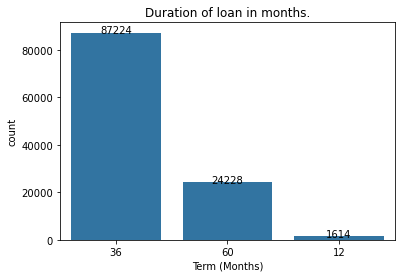

In [15]:
base_color = sb.color_palette()[0]
sb.countplot(x='Term',data=loandata_new2,color=base_color,order=loandata_new2['Term'].value_counts().index)
plt.xlabel('Term (Months)')
# Adding counts of each term in our data on top of of each bar.
for i in range (loandata_new2['Term'].value_counts().shape[0]):
    count = loandata_new2['Term'].value_counts().values[i]
    plt.text(i, count+3000, count, ha = 'center', va='top')
plt.title('Duration of loan in months.');


From the above plot we can say that the duration of the loan (in months) is maximum for 36 months and minimum for 12 months. We will try to find out why loan term is minimum for 12 months and maximum for 36 months later.

### Loan Status

In [16]:
loandata_new2['LoanStatus'].value_counts()

Current                   55730
Completed                 38061
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        800
Past Due (31-60 days)       361
Past Due (61-90 days)       311
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      203
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

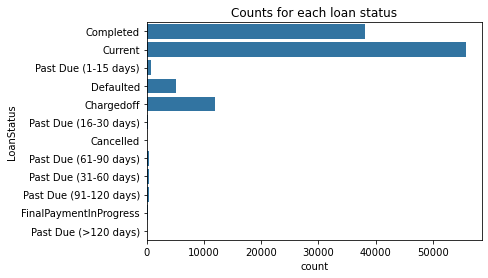

In [17]:
# We would be using a Countplot to visualize the count for each LoanStatus.
sb.countplot(y='LoanStatus',data = loandata_new2,color=base_color)
plt.title('Counts for each loan status');

From the above chart we can see that the LoanStatus 'Current' has the most count followed by 'Completed'. That is we have a total of 55730 people that took loan.

### Borrower APR

It is a continuous variable, hence a histogram will be suitable choice. First, it helps to look at some descriptive statistics for BorrowerAPR.



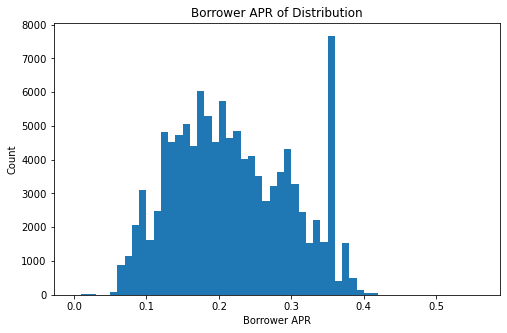

In [18]:
bins = np.arange(0, loandata_new2.BorrowerAPR.max()+0.05, 0.01)
plt.figure(figsize=[8, 5])
plt.hist(data = loandata_new2, x = 'BorrowerAPR', bins = bins);
plt.xlabel('Borrower APR');
plt.ylabel('Count')
plt.title('Borrower APR of Distribution');

Count of borrower APR between 0.34 and 0.36 is maximum. This could mean that average percentage rate for many loans is approximately between 0.3 and 0.4 which is very high. And minimum APR is approx. 0.02. There are some high bins between 0.16 and 0.2. There is a fall in count of APR values after 0.2 but again APR increases from 0.26 to 0.3. Than data fall and again their is huge rise in the count of APR.

### Borrower Rate

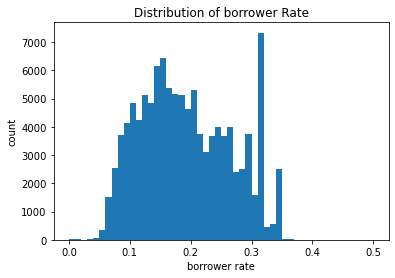

In [19]:
# Plotting histogram.
bins = np.arange(0,loandata_new2['BorrowerRate'].max()+0.01,0.01) 
plt.hist(x='BorrowerRate',data=loandata_new2,bins=bins)
plt.title('Distribution of borrower Rate')
plt.xlabel('borrower rate')
plt.ylabel('count');

It is a bimodal distribution with one peak lie between 0.15 and 0.17 and another peak lies between 0.30 and 0.33. It is right skewed distribution. After 0.16 rate there is decrease in count but between 0.32 and 0.34 their is sudden increase in the count of borrower rate.

### Listing Category

We would be adding a new column to show the names of the Listing category.

In [20]:
# Category names for each numerical value.
listingcat_names={0:'Not Available',1:'Debt Consolidation',2:'Home Improvement',3:'Business',4:'Personal Loan',5:'Student Use',6:'Auto',
 7:'Other',8:'Baby&Adoption',9:'Boat',10:'Cosmetic Procedure',11:'Engagement Ring',12:'Green Loans',
 13:'Household Expenses',14:'Large Purchases',15:'Medical/Dental',16:'Motorcycle',17:'RV',18:'Taxes',19:'Vacation',20:'Wedding Loans'}


In [21]:
# Run a loop over dataset and dictionary created.
#Appending dictionary values to a list based on keys which are equal to the values present in our listing category.
l=[]
for i in range(loandata_new2.shape[0]):
    for j in range(len(listingcat_names)):
        if loandata_new2['ListingCategory (numeric)'].values[i] == list(listingcat_names.keys())[j]:
            l.append(list(listingcat_names.values())[j])


In [22]:
# Assign a new column with listing label.
loandata_new2['ListingLabel'] = l

/var/folders/7m/p253gx1d6wq1q87znztt21zr0000gn/T/ipykernel_53950/1284306880.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loandata_new2['ListingLabel'] = l


In [23]:
loandata_new2.head(5)

LoanKey  Term LoanStatus  BorrowerAPR  BorrowerRate  \
0  E33A3400205839220442E84    36  Completed      0.16516        0.1580   
1  9E3B37071505919926B1D82    36    Current      0.12016        0.0920   
2  6954337960046817851BCB2    36  Completed      0.28269        0.2750   
3  A0393664465886295619C51    36    Current      0.12528        0.0974   
4  A180369302188889200689E    36    Current      0.24614        0.2085   

   ListingCategory (numeric) BorrowerState     Occupation EmploymentStatus  \
0                          0            CO          Other    Self-employed   
1                          2            CO   Professional         Employed   
2                          0            GA          Other    Not available   
3                         16            GA  Skilled Labor         Employed   
4                          2            MN      Executive         Employed   

   LoanOriginalAmount  CreditScoreRangeLower  CreditScoreRangeUpper  \
0                9425                  640.0                  659.0   
1               10000                  680.0                  699.0   
2                3001                  480.0                  499.0   
3               10000                  800.0                  819.0   
4               15000                  680.0                  699.0   

   DebtToIncomeRatio  Investors  StatedMonthlyIncome  MonthlyLoanPayment  \
0               0.17        258          3083.333333              330.43   
1               0.18          1          6125.000000              318.93   
2               0.06         41          2083.333333              123.32   
3               0.15        158          2875.000000              321.45   
4               0.26         20          9583.333333              563.97   

   IncomeVerifiable      ListingLabel  
0              True     Not Available  
1              True  Home Improvement  
2              True     Not Available  
3              True        Motorcycle  
4              True  Home Improvement

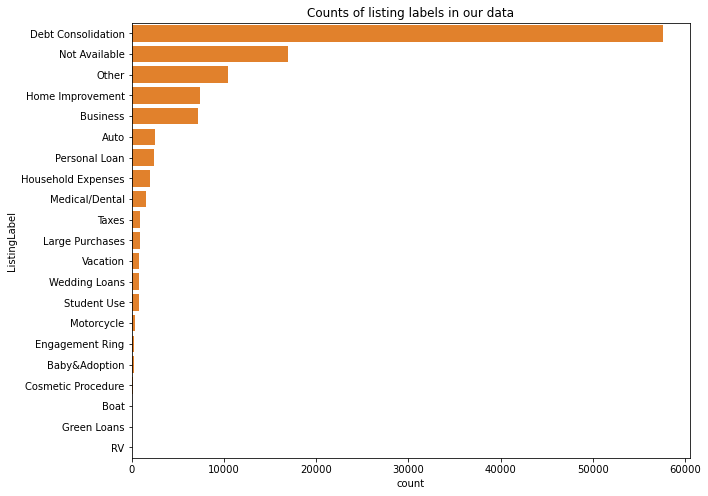

In [24]:
base_color2 = sb.color_palette()[1]
plt.figure(figsize=(10,8))
sb.countplot(y='ListingLabel',data=loandata_new2,order=loandata_new2['ListingLabel'].value_counts().index,color=base_color2)
plt.title('Counts of listing labels in our data');


In the above chart we can see that the Debt consolidation has the highest count. Most people take loan for debt consolidation.

### Borrower's State

In [25]:
# We would be plotting the map of US states using plotly.

fig = px.choropleth(locations=loandata_new2['BorrowerState'].value_counts().index, locationmode="USA-states",color= loandata_new2['BorrowerState'].value_counts().values,scope="usa", hover_name=loandata_new2['BorrowerState'].value_counts().index,hover_data={'Borrowers':loandata_new2['BorrowerState'].value_counts().values})
fig.layout.coloraxis.colorbar.title = 'Number of Borrowers'
fig.layout.title = 'U.S map showing states and counts of borrowers from each states in the data.'
fig.show()

The map shows that the maximum number of borrowers (14594) are  from Califonia.

### Occupation

In [26]:
# Create a new variable name Occupations
occupations = loandata_new2['Occupation'].value_counts()

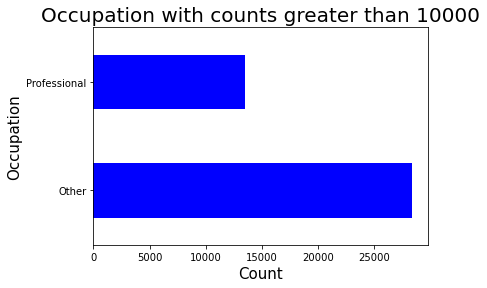

In [27]:
# Check for count of Occupations greater than 10000
occupations[occupations >10000].plot.barh(color='blue',rot=0)
plt.title('Occupation with counts greater than 10000',fontdict={'size':20})
plt.xlabel('Count',fontdict={'size':15})
plt.ylabel('Occupation',fontdict={'size':15})
plt.show()

Occupations categorized as OTHERS are more.

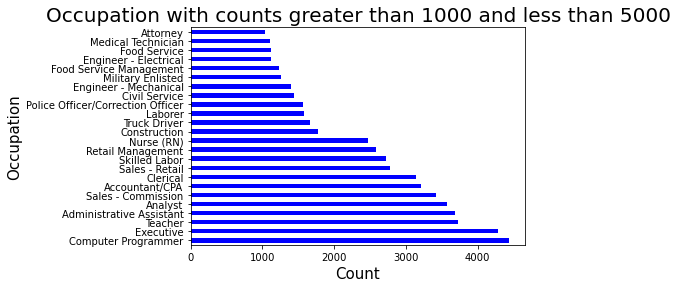

In [28]:
# Check for Occupation greater than 1000 and less than 5000
occupations[(occupations > 1000) & (occupations < 5000)].plot.barh(color='blue',rot=0)
plt.title('Occupation with counts greater than 1000 and less than 5000',fontdict={'size':20})
plt.xlabel('Count',fontdict={'size':15})
plt.ylabel('Occupation',fontdict={'size':15})
plt.show()

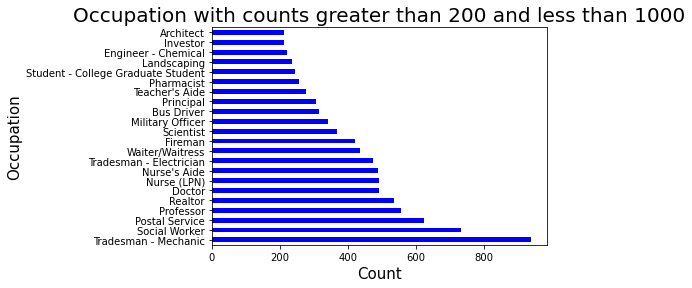

In [29]:
# Check for occupations less than 200 and less than 1000
occupations[(occupations > 200) & (occupations < 1000)].plot.barh(color='blue',rot=0)
plt.title('Occupation with counts greater than 200 and less than 1000',fontdict={'size':20})
plt.xlabel('Count',fontdict={'size':15})
plt.ylabel('Occupation',fontdict={'size':15})
plt.show()

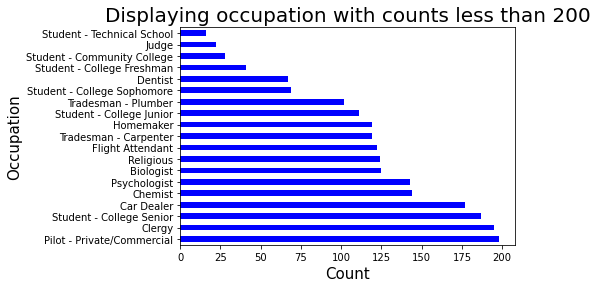

In [30]:
# Check for occupation less than 200
occupations[occupations < 200].plot.barh(color='blue',rot=0)
plt.title('Displaying occupation with counts less than 200',fontdict={'size':20})
plt.xlabel('Count',fontdict={'size':15})
plt.ylabel('Occupation',fontdict={'size':15})
plt.show()


### Employment status

In [31]:
loandata_new2['EmploymentStatus'].value_counts()

Employed         66598
Full-time        26354
Self-employed     6052
Not available     5347
Other             3742
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

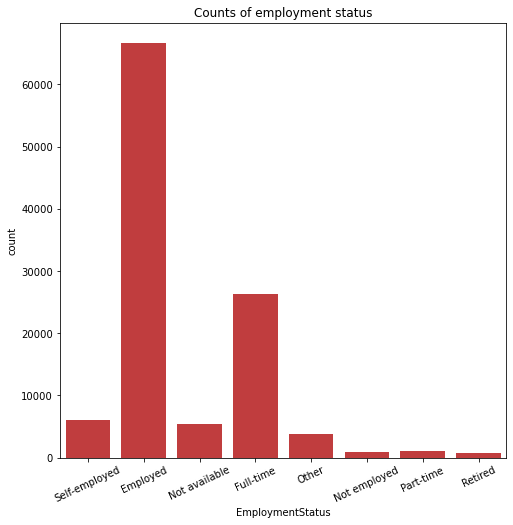

In [32]:
# Plotting countplots

base_color4 = sb.color_palette()[3]
plt.figure(figsize=(8,8))
sb.countplot(x='EmploymentStatus',data=loandata_new2,color=base_color4)
plt.xticks(rotation=25)
plt.title('Counts of employment status');

The graph above shows that a maximum number are employed while the minimum are unemployed.

### Loan Original Amount

In [33]:
loandata_new2['LoanOriginalAmount'].describe()

count    113066.000000
mean       8314.762307
std        6237.007841
min        1000.000000
25%        4000.000000
50%        6300.000000
75%       12000.000000
max       35000.000000
Name: LoanOriginalAmount, dtype: float64

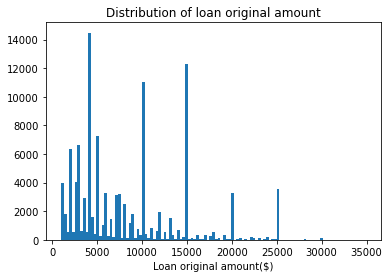

In [34]:
# Plotting histogram.
bins = np.arange(1000,loandata_new2['LoanOriginalAmount'].max()+40,300)
plt.hist(x='LoanOriginalAmount',data=loandata_new2,bins=bins)
plt.title('Distribution of loan original amount')
plt.xlabel('Loan original amount($)');


In [35]:
np.log10(loandata_new2['LoanOriginalAmount'].describe())


count    5.053332
mean     3.919850
std      3.794976
min      3.000000
25%      3.602060
50%      3.799341
75%      4.079181
max      4.544068
Name: LoanOriginalAmount, dtype: float64

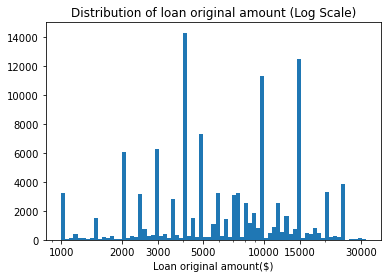

In [36]:
# plotting the histogram but with log transgormation.
bins = 10** np.arange(3,4.5+0.01,0.02)
tick = [1000,2000,3000,5000,10000,15000,30000]
labels=['{}'.format(x)for x in tick]
plt.hist(x='LoanOriginalAmount',data=loandata_new2,bins=bins)
plt.xscale('log')
plt.xticks(tick,labels)
plt.title('Distribution of loan original amount (Log Scale)')
plt.xlabel('Loan original amount($)');

From the above we can see that the data is right skewed.
Secondly, from descriptive statistics we can see that minimum loan original amount is 1000 whereas maximum loan original amount is 35000.
Third, from displot we can see that density of data points is highest between approx. 1000 and 8000. This means that the loan original amount taken by the maximum number of borrowers ranges from approx. 1000 to 8000.



### Debt To Income Ratio

In [37]:
loandata_new2['DebtToIncomeRatio'].describe()

count    104594.000000
mean          0.276032
std           0.553738
min           0.000000
25%           0.140000
50%           0.220000
75%           0.320000
max          10.010000
Name: DebtToIncomeRatio, dtype: float64

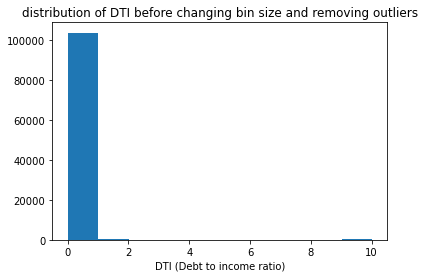

In [38]:
# Plotting histogram
plt.hist(x='DebtToIncomeRatio',data=loandata_new2)
plt.title('distribution of DTI before changing bin size and removing outliers')
plt.xlabel('DTI (Debt to income ratio)');

From the above most of our data falls between 0 and 1. Also, there are some points greater than 1 between 1 and 2, 9 and 10.These are outliers because highest debttoincome ratio is approx. 50%.

In [39]:
# Select outliers in debt to income ratio with ratio greater than 1.
dti_outliers = (loandata_new2['DebtToIncomeRatio']>1)

In [40]:
out_df = loandata_new2.loc[dti_outliers,:]

In [41]:
#Removing outlier from our data.
filter_loandata = loandata_new2.loc[-dti_outliers,:]

In [42]:
filter_loandata.head()

LoanKey  Term LoanStatus  BorrowerAPR  BorrowerRate  \
0  E33A3400205839220442E84    36  Completed      0.16516        0.1580   
1  9E3B37071505919926B1D82    36    Current      0.12016        0.0920   
2  6954337960046817851BCB2    36  Completed      0.28269        0.2750   
3  A0393664465886295619C51    36    Current      0.12528        0.0974   
4  A180369302188889200689E    36    Current      0.24614        0.2085   

   ListingCategory (numeric) BorrowerState     Occupation EmploymentStatus  \
0                          0            CO          Other    Self-employed   
1                          2            CO   Professional         Employed   
2                          0            GA          Other    Not available   
3                         16            GA  Skilled Labor         Employed   
4                          2            MN      Executive         Employed   

   LoanOriginalAmount  CreditScoreRangeLower  CreditScoreRangeUpper  \
0                9425                  640.0                  659.0   
1               10000                  680.0                  699.0   
2                3001                  480.0                  499.0   
3               10000                  800.0                  819.0   
4               15000                  680.0                  699.0   

   DebtToIncomeRatio  Investors  StatedMonthlyIncome  MonthlyLoanPayment  \
0               0.17        258          3083.333333              330.43   
1               0.18          1          6125.000000              318.93   
2               0.06         41          2083.333333              123.32   
3               0.15        158          2875.000000              321.45   
4               0.26         20          9583.333333              563.97   

   IncomeVerifiable      ListingLabel  
0              True     Not Available  
1              True  Home Improvement  
2              True     Not Available  
3              True        Motorcycle  
4              True  Home Improvement

In [43]:
filter_loandata.shape

(112268, 18)

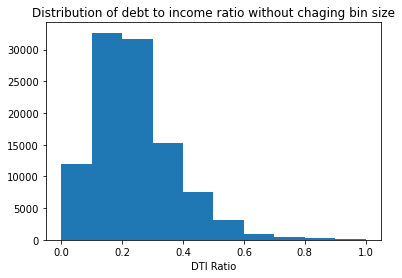

In [44]:
# Plotting histogram after removal of outliers.
plt.hist(x='DebtToIncomeRatio',data=filter_loandata)
plt.xlabel('DTI Ratio')
plt.title('Distribution of debt to income ratio without chaging bin size');

DTI Ratio is unimodal but distribution is slightly right skewed. Let's look at the data more closely to see if it holds interesting pattern.

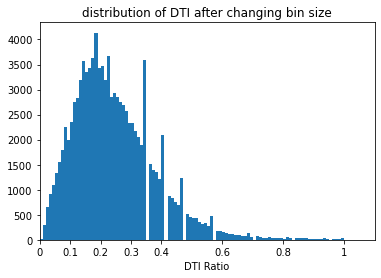

In [45]:
# Plotting a histogram with more number of bins.
bins = np.arange(0,1+0.01,0.01)
tick = [0,0.1,0.2,0.3,0.4,0.6,0.8,1]
labels = ['{}'.format(v)for v in tick]
plt.hist(x='DebtToIncomeRatio',data=filter_loandata,bins=bins)
plt.xlabel('DTI Ratio')
#plt.xscale('log');
plt.xticks(np.array(tick),labels)
plt.xlim(0,1.1)
plt.title('distribution of DTI after changing bin size');

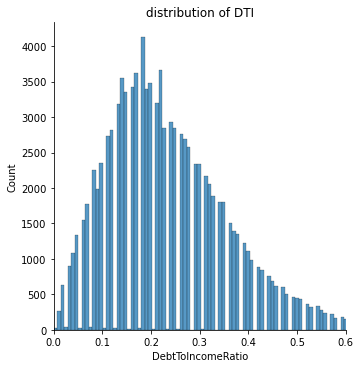

In [46]:
# Plotting displot just to check the distribution of DTI.
sb.displot(x='DebtToIncomeRatio',data=filter_loandata,kind='hist',rug_kws={'c':'red'})
plt.xlim(0,0.6)
plt.title('distribution of DTI');

Maximum DTI lies between 0.15 and 0.2 which is quite good DTI. 

### Stated Montly Income

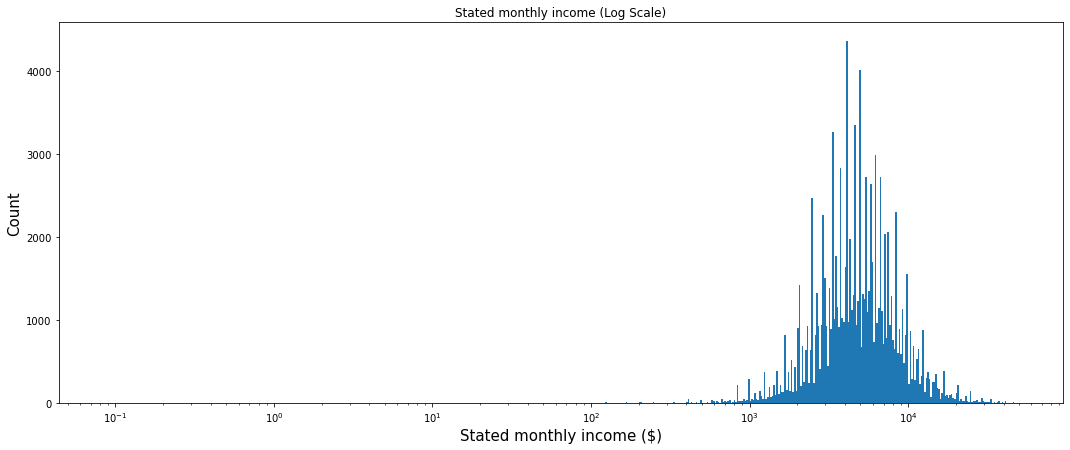

In [47]:
# Plotting histogram
plt.figure(figsize=[18,7])
bins = 10**np.arange(-1.07,4.6+0.1,0.01)
ticks = [0,5e2,1e3,2e3,3e3,4e3,5e3,10e3,15e3,20e3,25e3,30e3,35e3,40e3]
labels = ['{}'.format(v)for v in ticks]
plt.hist(x='StatedMonthlyIncome',data=filter_loandata,bins=bins)
plt.xscale('log')
plt.xlabel('Stated monthly income ($)',fontdict={'size':15})
plt.ylabel('Count',fontdict={'size':15})
plt.title('Stated monthly income (Log Scale)');


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

In debt to income variable, there were some points which were greater than 1. So, I considered them as outliers because when I did some research about minimum and maximum DTI, I found that maximum DTI can reach upto 50% or 0.5. So, it is very unlikely that DTI would be greater than 1.
I performed some transformation on Debt to income ratio variable, Loan original amount variable, and borrower rate.



### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?


I did some transformation on Debt to income ratio variable, Loan original amount variable, and borrower rate.
These transformations include:

1- Changing X-ticks to view more exact point of interest.

2- Changing bins size to reduce noise in the graph and view data more precisely.


# Bivariate Exploration

To start off with, I want to look at the pairwise correlations present between features in the data.

In [48]:
filter_loandata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112268 entries, 0 to 113936
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   LoanKey                    112268 non-null  object 
 1   Term                       112268 non-null  int64  
 2   LoanStatus                 112268 non-null  object 
 3   BorrowerAPR                112243 non-null  float64
 4   BorrowerRate               112268 non-null  float64
 5   ListingCategory (numeric)  112268 non-null  int64  
 6   BorrowerState              106866 non-null  object 
 7   Occupation                 108752 non-null  object 
 8   EmploymentStatus           110025 non-null  object 
 9   LoanOriginalAmount         112268 non-null  int64  
 10  CreditScoreRangeLower      111679 non-null  float64
 11  CreditScoreRangeUpper      111679 non-null  float64
 12  DebtToIncomeRatio          103796 non-null  float64
 13  Investors                  11

In [49]:
loandata_df = filter_loandata.reset_index()

In [50]:
# Dropping index.
loandata_df=loandata_df.drop('index',axis=1)


In [51]:
loandata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112268 entries, 0 to 112267
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   LoanKey                    112268 non-null  object 
 1   Term                       112268 non-null  int64  
 2   LoanStatus                 112268 non-null  object 
 3   BorrowerAPR                112243 non-null  float64
 4   BorrowerRate               112268 non-null  float64
 5   ListingCategory (numeric)  112268 non-null  int64  
 6   BorrowerState              106866 non-null  object 
 7   Occupation                 108752 non-null  object 
 8   EmploymentStatus           110025 non-null  object 
 9   LoanOriginalAmount         112268 non-null  int64  
 10  CreditScoreRangeLower      111679 non-null  float64
 11  CreditScoreRangeUpper      111679 non-null  float64
 12  DebtToIncomeRatio          103796 non-null  float64
 13  Investors                  11

In [52]:
# Making a list of all numerical variables.
numeric_var = ['Term','BorrowerAPR','BorrowerRate','LoanOriginalAmount','CreditScoreRangeLower','CreditScoreRangeUpper','DebtToIncomeRatio','Investors','StatedMonthlyIncome']
categoric_vars = ['cut', 'color', 'clarity']

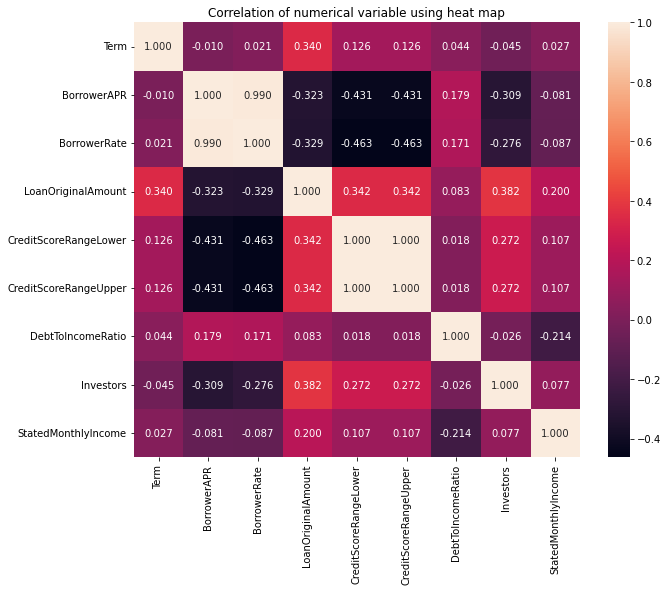

In [53]:
# Plotting a heat map to show the correlation of each numerical variable.
plt.figure(figsize=(10,8))
sb.heatmap(data=loandata_df[numeric_var].corr(),annot=True,fmt='.3f')
plt.title('Correlation of numerical variable using heat map');

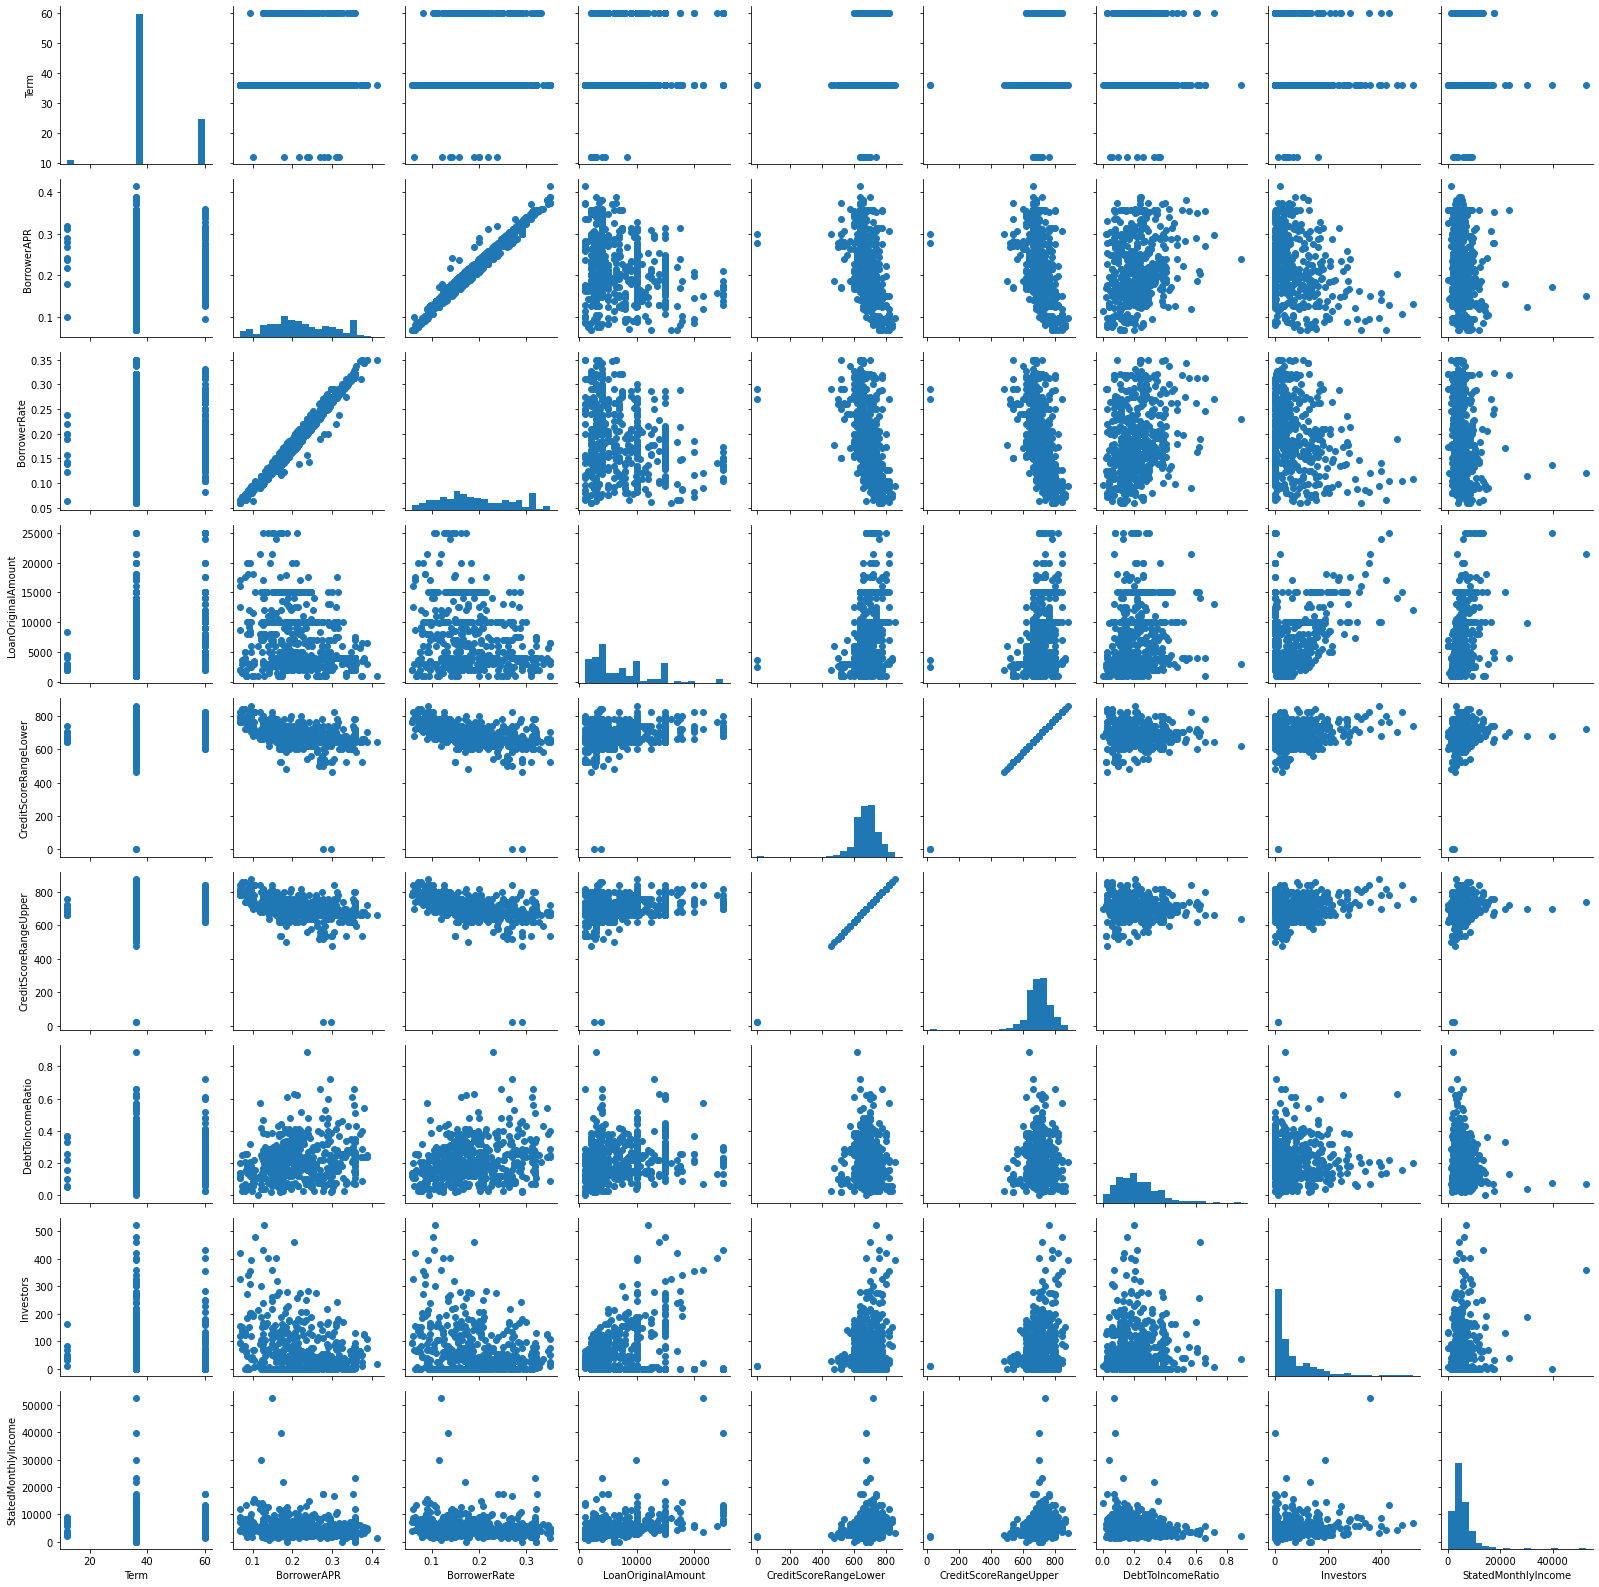

In [54]:
# plot matrix: sample 500 so that plots are clearer and
# they render faster
samples = np.random.choice(loandata_df.shape[0], 500, replace = False)
loan_samp = loandata_df.loc[samples,:]

g = sb.PairGrid(data = loan_samp, vars = numeric_var)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

From the above graphs, the following was noticed:
Borrower APR is highly correlated with Borrower Rate.If borrower rate increases borrower APR will also increase and vice-versa.
There is a moderate correlation between investors and Loan original amount.
It is strange that debt to income ratio is very low correlated with every other variable. It could be due to not including large number of features from main dataframe 'df'. But I will try to explore this feature with categorical variables. Also, if we look at the DTI (debt to income ratio) graph (pairplot) and compare it with the graphs of borrower APR and borrower Rate, we can observe that their is some correlation between these variables.
There seem to be some outliers present in credit score range upper and credit score range lower variables. I will remove them and then again plot the pairgrid to see the correlation.
There is moderate negative correlation between loan original amount and Borrower APR, Borrower Rate variables.

### Removing outliers from credit score range upper and credit score range lower variables with values below 300.

In [55]:
loandata_df[['CreditScoreRangeLower','CreditScoreRangeUpper']].describe()

CreditScoreRangeLower  CreditScoreRangeUpper
count          111679.000000          111679.000000
mean              685.646003             704.646003
std                66.569251              66.569251
min                 0.000000              19.000000
25%               660.000000             679.000000
50%               680.000000             699.000000
75%               720.000000             739.000000
max               880.000000             899.000000

In [56]:
# Selecting outliers with credit score range for both, lower and upper, less than 300.
outlier_loandata = (loandata_df['CreditScoreRangeLower']<300) | (loandata_df['CreditScoreRangeUpper']<300)

In [57]:
# Removing outliers from data.
loandata_df=loandata_df.loc[-outlier_loandata,:]


In [58]:
loandata_df = loandata_df.reset_index()

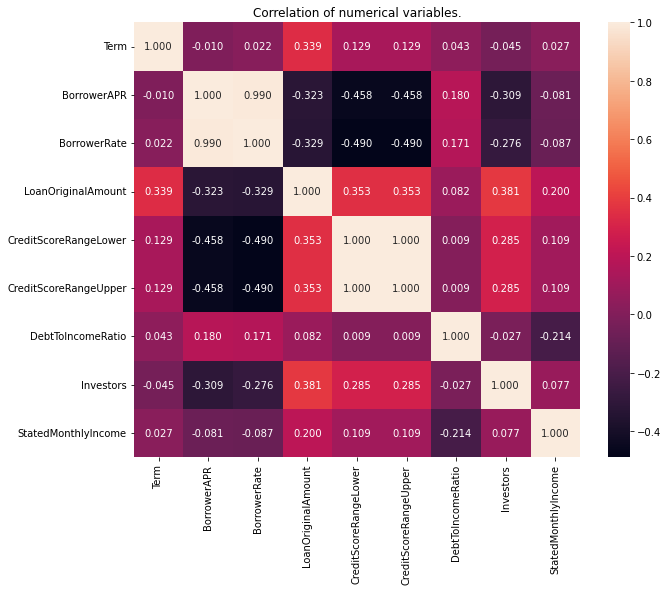

In [59]:
# Plotting heat map without outliers in our dataset.
plt.figure(figsize=(10,8))
sb.heatmap(data=loandata_df[numeric_var].corr(),annot=True,fmt='.3f')
plt.title('Correlation of numerical variables.');


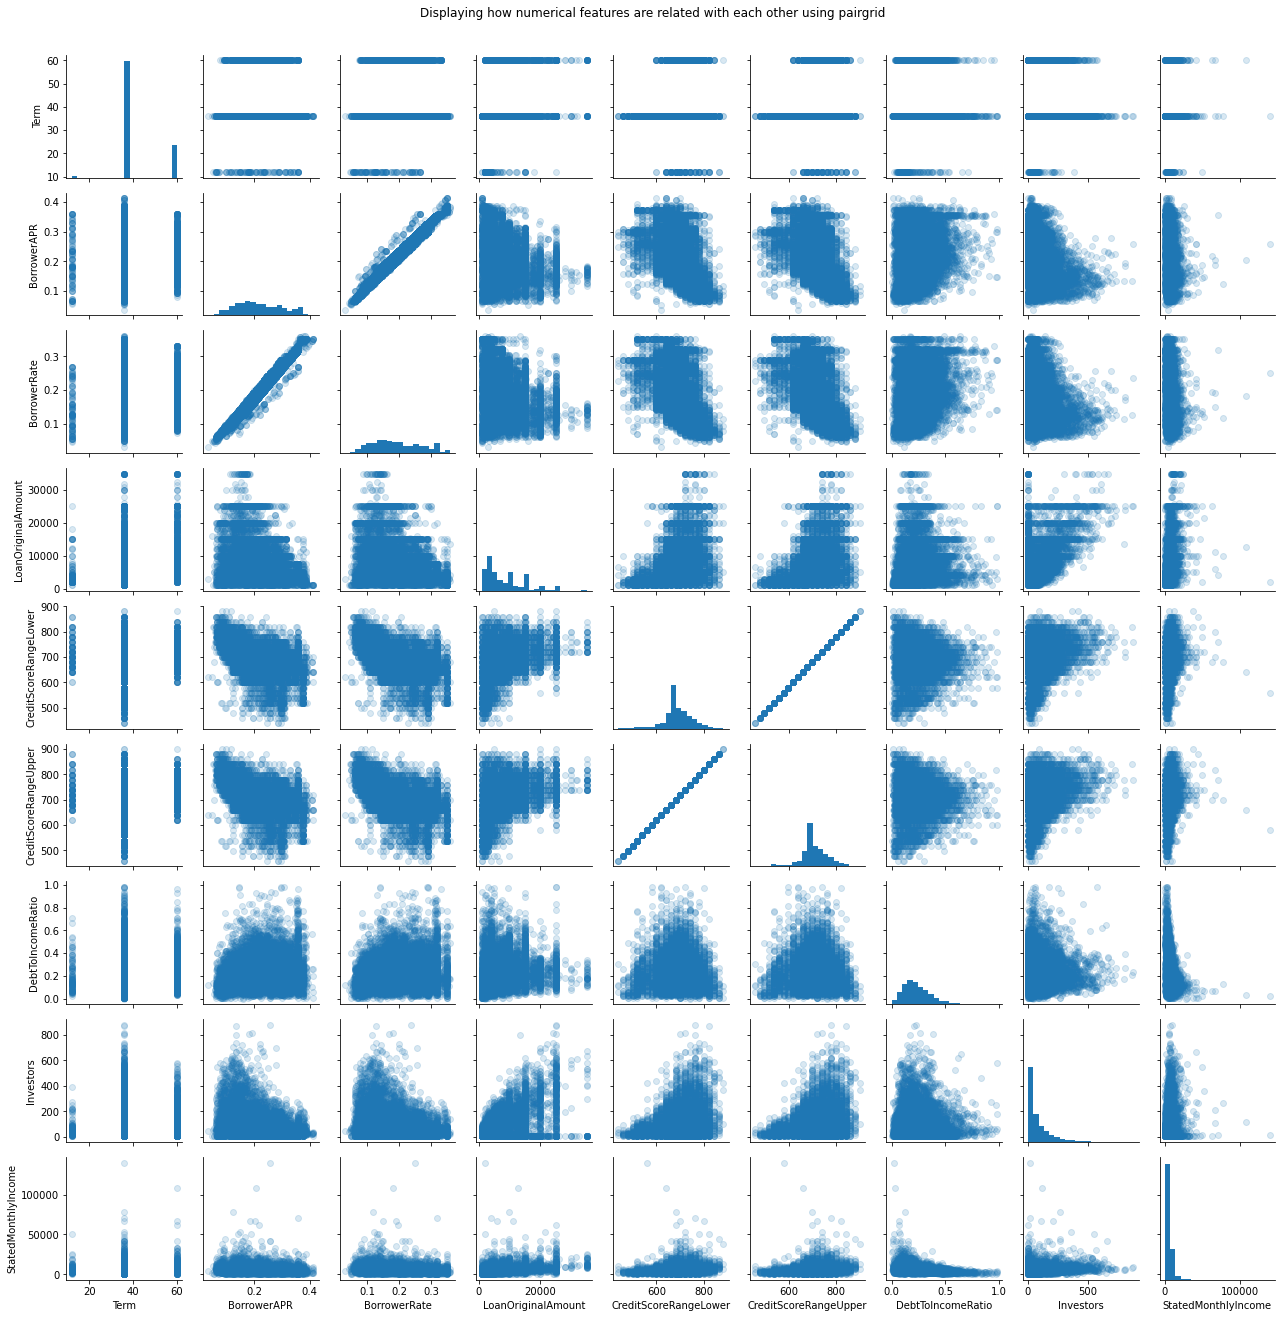

In [60]:
# plot matrix: sample 500 loans so that plots are clearer.
samples = np.random.choice(loandata_df.shape[0], 10000, replace = False)
loan_samp = loandata_df.loc[samples,:]
pg = sb.PairGrid(data = loan_samp, vars = numeric_var,height=2)
pg = pg.map_diag(plt.hist, bins = 20)
pg.map_offdiag(plt.scatter,alpha=1/6)
pg.fig.suptitle('Displaying how numerical features are related with each other using pairgrid',y=1.02);

After removing outliers, I have concluded several points:
1- We can see the moderate negative correlation between investors and Borrower APR, Rate variable more clearly.
2- Also, we can see the moderate negative correlation of credit score lower and upper range with both Borrower APR, Rate variables more clearly.
3- We can clearly see the moderate positive correlation between loan original amount and Credit score lower and upper.
4- Debt to income ratio is moderately negatively correlated with stated monthly income.

### Borower APR and Loan Status

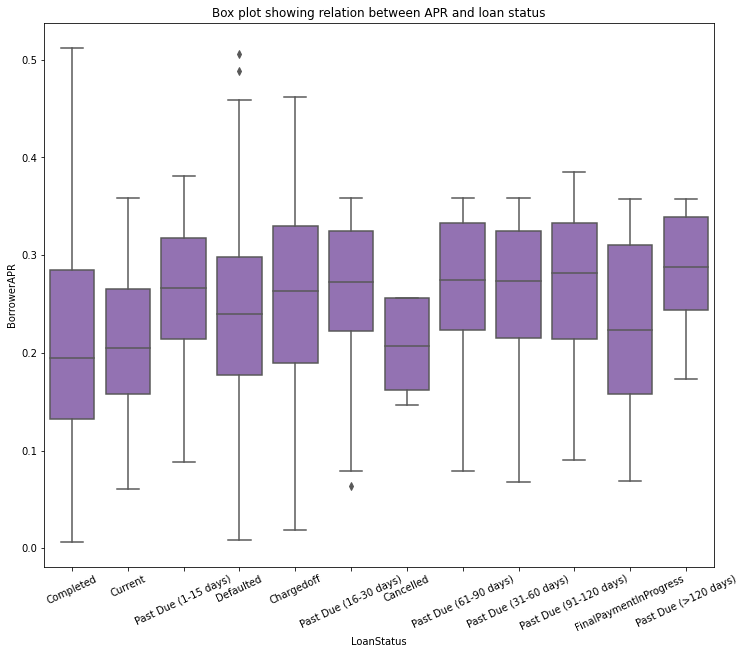

In [61]:
# Plotting boxplot.
plt.figure(figsize=(12,10))
base_c = sb.color_palette()[4]
sb.boxplot(x='LoanStatus',y='BorrowerAPR',data=loandata_df,color=base_c)
plt.xticks(rotation=25)
plt.title('Box plot showing relation between APR and loan status');

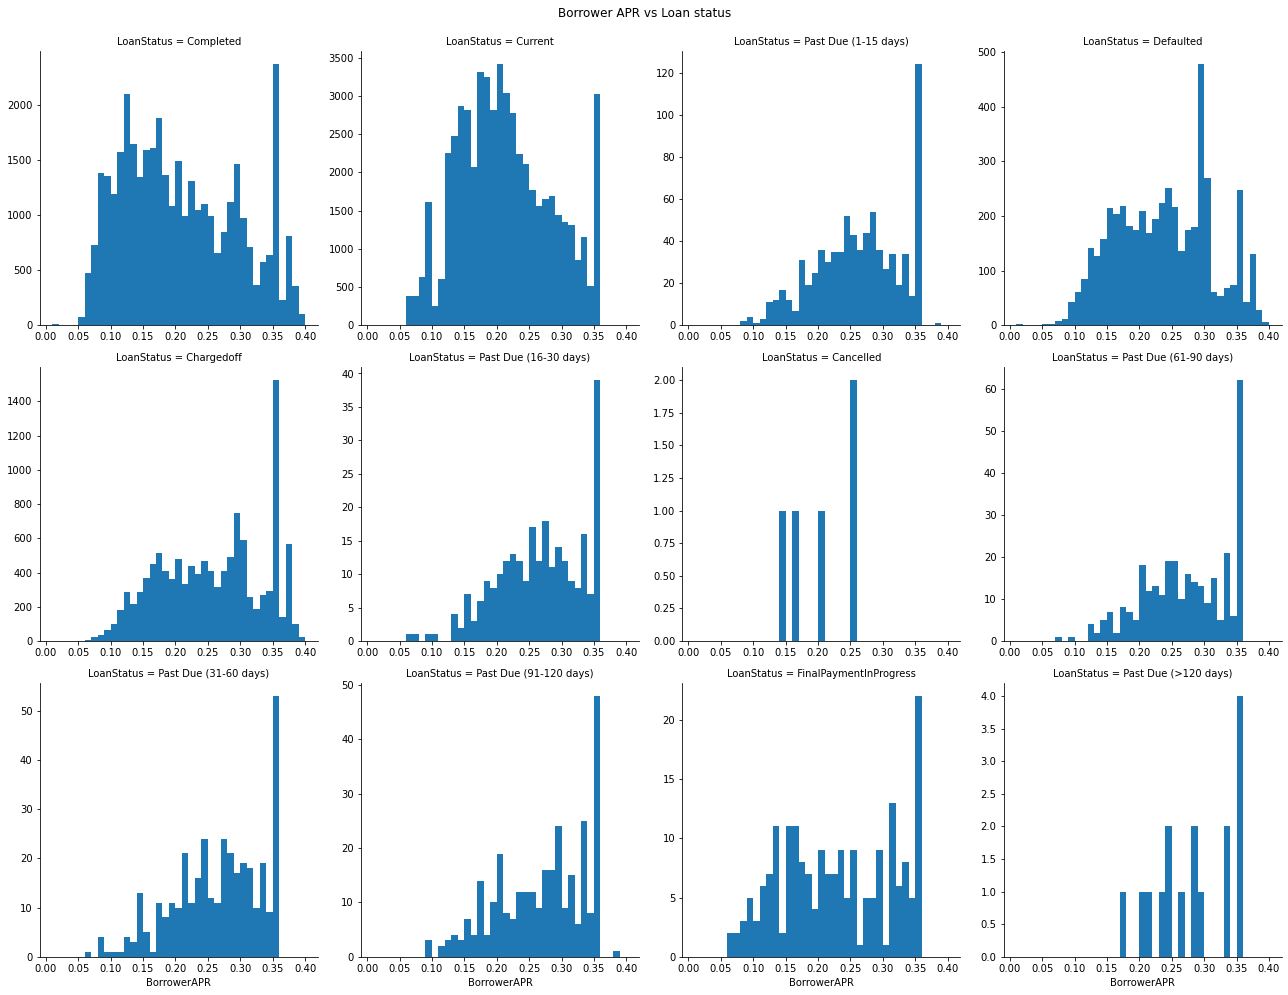

In [62]:
# Plotting histogram with seaborn's facetgrid function.
bins = np.arange(0.01,0.4+0.01,0.01)
f=sb.FacetGrid(data=loandata_df,col='LoanStatus',col_wrap=4,sharey=False,sharex=False,height=4.5)
f.map(plt.hist,'BorrowerAPR',bins=bins)
f.fig.suptitle('Borrower APR vs Loan status',y=1.02);


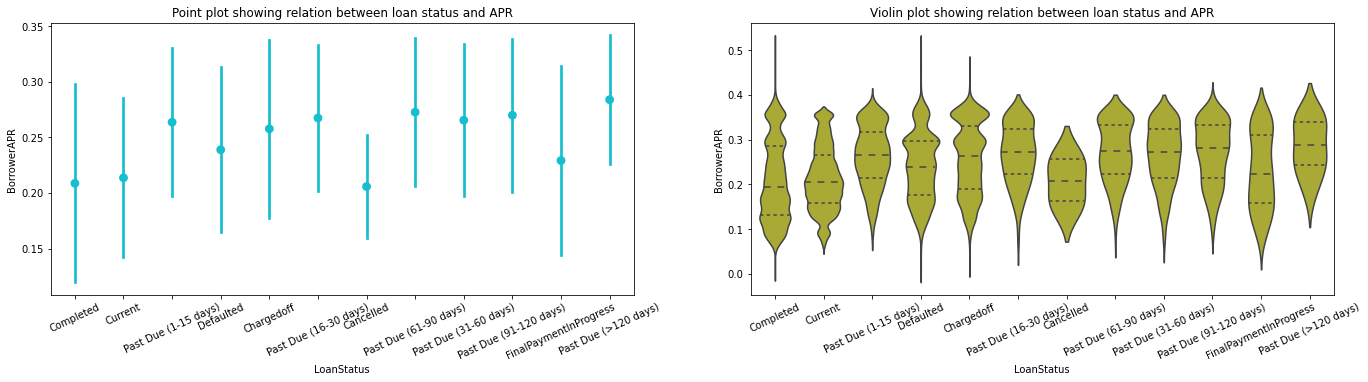

In [63]:
# Plotting pointplot
plt.figure(figsize=(23,5))
plt.subplot(1,2,1)
base_c=sb.color_palette()[9]
base_c2=sb.color_palette()[8]
sb.pointplot(data=loandata_df,x='LoanStatus',y='BorrowerAPR',join=False,ci='sd',color=base_c)
plt.xticks(rotation=25)
plt.title('Point plot showing relation between loan status and APR')
# plotting violin plot.
plt.subplot(1,2,2)
sb.violinplot(data=loandata_df,x='LoanStatus',y='BorrowerAPR',inner='quartile',color=base_c2)
plt.xticks(rotation=25)
plt.title('Violin plot showing relation between loan status and APR');


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

From the above four plots that is boxplot,histogram and pointplot I have gather some points which are discussed below:

Loan status- "Completed" has the lowest APR (approx. 0.02). Also, median of APR for "completed" variable is approx. 0.2 which is still the lowest. Moreover, most of the APR values lie between first quertile (approx. 0.14 APR) and second quertile (approx. 0.20 APR). However, maximum APR lie just above 0.4.

Loan Status- "Current" variable's median is approx. 0.22 APR which is second lowest after "Completed" loan status. Lowest APR is approx. 0.05 and highest APR is 0.36. Distribution is left skewed a little bit. From violin plot we can see that most of the APR values lie between first quartile and second quartile ranging from approx. 0.13 to 0.23. Also, data is unimodal having one peak.
Loan Status- "Past Due (1-15 days)" Distribution is left skewed with lowest whisker length extends to approx. 0.08 APR and maximum whisker length extends to approx. 0.38. Median is approx. 0.26 and data is slightly unimodal having one peak.

Loan Status- "Defaulted" Distribution is left skewed and data is unimodal having one peak. Minimum APR is approx. 0.03 and maximum APR is approx. 0.42. Desnity of APR is greatest between 0.23 and 0.32 APR values and nearly equal number of APR values lie between first quartile and median as compare to count of APR values between second quartile and third quartile.

Loan Status- 'Chargedoff', 'Past Due (16-30 days)', 'Past Due (61-90 days)','Past Due (31-60 days)', 'Past Due (91-120 days)' Distribution is left skewed and data is unimodal. Minimum value is approx. 0.03,0.07, 0.07, 0.06, 0.08 respectively. Maximum value is approx. 0.43 (greatest APR), 0.36,0.36,0.36,0.38 respectively. Median is approx 0.27,0.28,0.28,0.28,0.28 respectively.

Loan Status- 'FinalPaymentInProgress', 'Past Due (>120 days)', 'Cancelled' Distribution for 'FinalPaymentInProgress' is left skewed and data is unimodal with only one peak. For 'Past Due (>120 days)' variable, distribution is left skewed but data is multimodal having multiple peaks. Data in 'Past Due (>120 days)' seems to be less compared to other features. This could mean that very few borrowers who took loans had loan status of 'Past Due (>120 days)'. On the other hand, "cancelled" variable had only one value which is approx. 0.18 APR which means only one borrowers's loan was cancelled.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Some Loan status have high APR values and one loan status is cancelled with APR value of 0.18 approx. So, I will try to find why some loan status have high APR. Also, what features are responsible for high APR of loan status. By doing so we can avoid giving loans to borrowers on the basis of several features.

### Borrower APR and Borrower Rate Variable

In [64]:
for lab in ['BorrowerAPR','BorrowerRate']:
    bins = np.arange(0,loandata_df[lab].max()+0.04,0.04)
    bins = [round(x,2) for x in bins]
    loandata_df[f'{lab} cat'] = pd.cut(x=loandata_df[lab],bins=bins,labels=bins[1:],include_lowest=False)

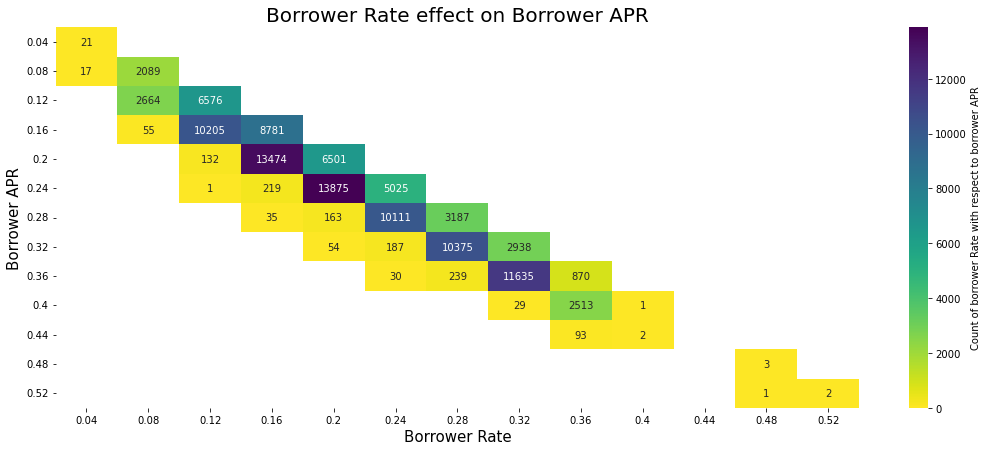

In [65]:
plt.figure(figsize=(18, 7))
sb.heatmap(loandata_df.groupby(['BorrowerAPR cat','BorrowerRate cat']).size().unstack('BorrowerRate cat').replace({0:np.nan}),annot=True,
           fmt='.0f',cmap='viridis_r',vmin=0,cbar_kws={'label':'Count of borrower Rate with respect to borrower APR'})
plt.title('Borrower Rate effect on Borrower APR',fontdict={'size':20})
plt.xlabel('Borrower Rate',fontdict={'size':15})
plt.ylabel('Borrower APR',fontdict={'size':15})
plt.yticks(rotation=0)
plt.show();

From above heat map I have made several observations:

Borrower Rate is highly proportional with borrower APR. This means that if we increase Borrower APR then Borrower Rate will also increase and vice-versa.
Maximum borrowers have APR and Rate between 0.1 and 0.2.(see dark portion)
Between 0.05 and 0.2, count of borrower APR and borrower Rate increases. Between 0.2 and 0.35 count of borrower APR and rate decreases.

### Multivariate Exploration¶

### Loan Status with Borrower APR and Borrower Rate.

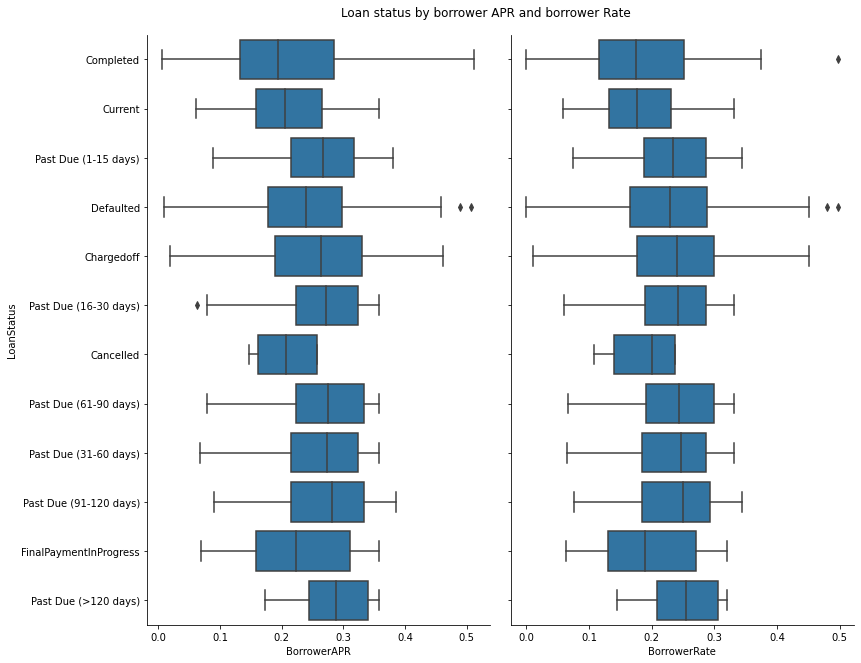

In [66]:
# Plotting boxplot using seaborn's facetgrid.
g = sb.PairGrid(data = loandata_df, x_vars = ['BorrowerAPR', 'BorrowerRate'],
                y_vars = 'LoanStatus',height=9,aspect=0.6)
g.map(sb.boxplot, color=base_color)
g.fig.suptitle('Loan status by borrower APR and borrower Rate',y=1.02);

I can not make any interpretation from above plot as their are so many box plots. I will try to use different plotting style to make any interpretations.



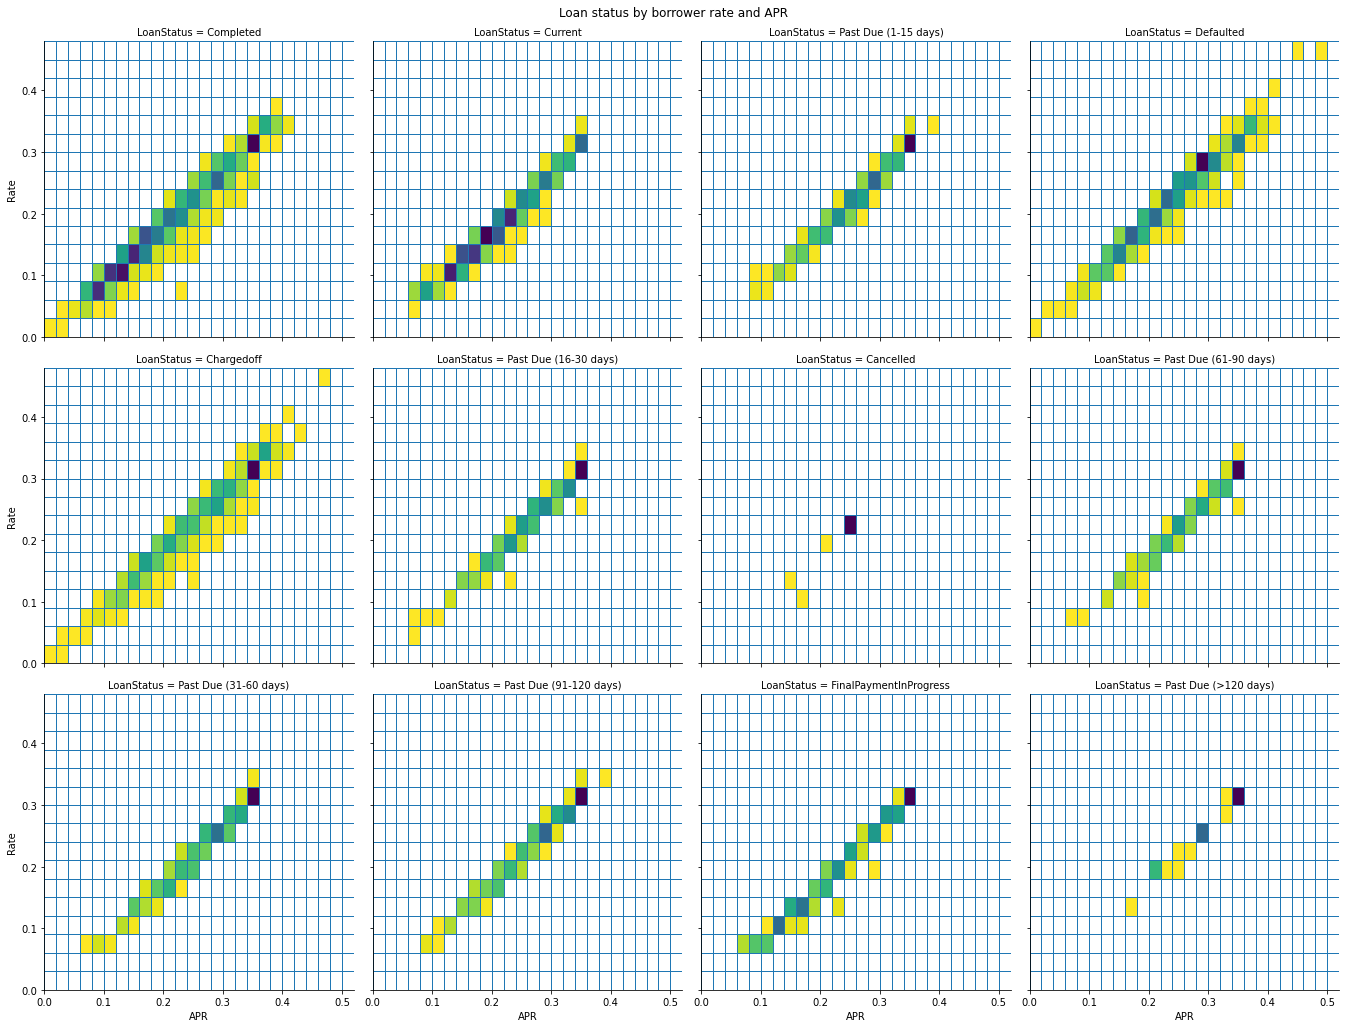

In [67]:
# Plotting heatmap using seaborn's facetgrid.
bins_x = np.arange(0,loandata_df['BorrowerAPR'].max()+0.01,0.02)
bins_y = np.arange(0,loandata_df['BorrowerRate'].max()+0.01,0.03)
g = sb.FacetGrid(data = loandata_df, col = 'LoanStatus', col_wrap = 4, height = 4.7)
g.map(plt.hist2d, 'BorrowerAPR', 'BorrowerRate',bins=[bins_x,bins_y], cmap = 'viridis_r', cmin = 0.5)
g.set_xlabels('APR')
g.set_ylabels('Rate')
g.fig.suptitle('Loan status by borrower rate and APR',y=1.01)

plt.show()


From above histogram 2d I have made several observations: 1- Out of all loan status, 'completed' and 'current' status are the only ones with maximum count of APR and rate less than or equal to 0.2.
2- Rest of the loan status have a 'cloud' of points above 0.2 for both APR and Rate except 'cancelled' status as it has only one record in our data. 3- If borrower APR and rate are high than loan status is more likely to be anything except 'current' and 'completed'



### Employment status and Borrower APR and Borrower Rate.

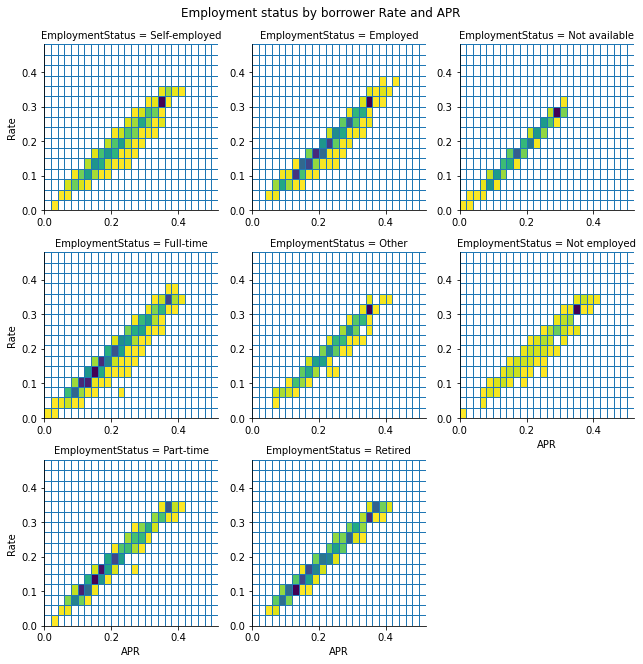

In [68]:
# Plotting heatmap using seaborn's facetgrid.
bins_x = np.arange(0,loandata_df['BorrowerAPR'].max()+0.01,0.02)
bins_y = np.arange(0,loandata_df['BorrowerRate'].max()+0.01,0.03)
g = sb.FacetGrid(data = loandata_df, col = 'EmploymentStatus', sharex=False,sharey=False,col_wrap = 3, height = 3)
g.map(plt.hist2d, 'BorrowerAPR', 'BorrowerRate',bins=[bins_x,bins_y], cmap = 'viridis_r', cmin = 0.5)
g.set_xlabels('APR')
g.set_ylabels('Rate')
g.fig.suptitle('Employment status by borrower Rate and APR',y=1.02)
plt.show()

Most of the data with the status 'Not Employed' had low APR and low rate (below 0.2).

## Conclusion

To make final statement about the relationships among variables we need to conduct statistical test and build predictive models.  

# Reference Links

[Features to support investigation](https://rpubs.com/jayant_singh/Prosper-Loan#:~:text=It%20is%20the%20prosper%20loan,dataset%20also%20has%20lender%20information.)

[Missing Values](https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/#:~:text=Checking%20for%20missing%20values%20using,null%20values%20in%20a%20series.)

[Importing Plotly](https://www.geeksforgeeks.org/python-plotly-tutorial/)